In [ ]:
import numpy as np
import pandas as pd
import seaborn as sb
from matplotlib.pyplot import figure, show

# Dataset

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Machine Learning Algorithm/Bangla Fake News Detection/Dataset/LabeledAuthentic-7K.csv', engine='python', encoding='utf-8')
df.shape

(7202, 9)

In [ ]:
df1= pd.read_csv('/content/drive/MyDrive/Machine Learning Algorithm/Bangla Fake News Detection/Dataset/LabeledFake-1K.csv', engine='python', encoding='utf-8')
df1.shape

(1299, 10)

In [ ]:
df2= pd.read_csv('/content/drive/MyDrive/Machine Learning Algorithm/Bangla Fake News Detection/Dataset/Authentic-48K.csv', engine='python', encoding='utf-8')
df2.shape

(48678, 7)

In [ ]:
df3= pd.read_csv('/content/drive/MyDrive/Machine Learning Algorithm/Bangla Fake News Detection/Dataset/Fake-1K.csv', engine='python', encoding='utf-8')
df3.shape

(1299, 7)

Merging All DataFrame

In [ ]:
#merging df & df1
merge = [df,df1,df2,df3]
merged = pd.concat(merge)
merged.shape

(58478, 10)

In [ ]:
#shuffle
merged = merged.sample(frac=1).reset_index(drop=True)

In [ ]:
merged.columns

Index(['articleID', 'domain', 'date', 'category', 'source', 'relation',
       'headline', 'content', 'label', 'F-type'],
      dtype='object')

Columns

- articleID : ID of the news
- domain : News publisher's site name
- date : Published Date
- category : Category of the news
- source	: Source of the news. (One who can verify the claim of the news)
- relation :	Related or Unrelated. Related if headline matches with content's claim otherwise it is labeled as Unrelated
- headline	: Headline of the news
- content	: Article or body of the news
- label :	1 or 0 . '1' for authentic '0' for fake
- F-type :	Type of fake news (Clickbait, Satire, Fake(Misleading or False Context))

In [ ]:
merged.head()

,articleID,domain,date,category,source,relation,headline,content,label,F-type
0,41322,kalerkantho.com,2018-10-04 12:12:43,Crime,NaN,NaN,চিকিৎসা নিয়ে খালেদার রিটের আদেশ দুপুরে,বিএনপি চেয়ারপারসন খালেদা জিয়াকে বিশেষায়িত হাসপ...,1.0,NaN
1,23734,bd-pratidin.com,2018-09-28 23:42:09,National,NaN,NaN,ইতিহাস থেকে একটু দূরে,পেশাদারিত্বের বিপক্ষে হৃদয়ের লড়াই। হদয়ের শতভাগ...,1.0,NaN
2,25438,ittefaq.com.bd,2018-09-28 19:05:29,National,NaN,NaN,খেলাপি ঋণ আদায়ে মামলা করতে হবে: গভর্নর,"বাংলাদেশ ব্যাংকের গভর্নর ফজলে কবির বলেছেন, খেল...",1.0,NaN
3,37436,prothomalo.com,2018-10-02 23:36:53,Editorial,NaN,NaN,পেনশনজীবীদের ভাগ্য খুলবে কবে?,আধুনিক সমাজব্যবস্থায় প্রবীণ নাগরিকদের জন্য বিভ...,1.0,NaN
4,32054,channelionline.com,2018-10-01 10:36:31,Editorial,NaN,NaN,"মানুষের পাশে থেকো, মানুষের কথা বল",বাংলাদেশ টেলিভিশনের বয়স তিপ্পান্ন বছর। আর সেই ...,1.0,NaN


In [ ]:
# details of the dataset
# This dataset is huge, so we will use "memory_usage" in df.info

def fast_intro(df):
    print("------Summary-----\n")
    print(df.info(memory_usage = "deep"))
    print("\n------Descriptive and Quartile Statistics------\n")
    print(df.describe())
    print("\n------1st 10 rows------\n")
    print(df.head(10))
    print("\n------last 10 rows------\n")
    print(df.tail(10))
    print("\n------Random 10 rows------\n")
    print(df.sample(10))

fast_intro(merged)

------Summary-----

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58478 entries, 0 to 58477
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   articleID  58478 non-null  int64  
 1   domain     58478 non-null  object 
 2   date       58478 non-null  object 
 3   category   58478 non-null  object 
 4   source     8501 non-null   object 
 5   relation   8501 non-null   object 
 6   headline   58478 non-null  object 
 7   content    58478 non-null  object 
 8   label      58478 non-null  float64
 9   F-type     1299 non-null   object 
dtypes: float64(1), int64(1), object(8)
memory usage: 233.5 MB
None

------Descriptive and Quartile Statistics------

          articleID         label
count  58478.000000  58478.000000
mean   26178.306868      0.900202
std    19379.622643      0.299733
min        1.000000      0.000000
25%     7094.000000      1.000000
50%    24555.500000      1.000000
75%    43085.750000      1.000000
m

Handling Null Value

In [ ]:
merged.isnull().sum()

articleID        0
domain           0
date             0
category         0
source       49977
relation     49977
headline         0
content          0
label            0
F-type       57179
dtype: int64

In [ ]:
merged.drop(['source'], axis=1, inplace=True)
merged.drop(['relation'], axis=1, inplace=True)
merged.drop(['F-type'], axis=1, inplace=True)

In [ ]:
# remove articleID
merged.drop(['articleID'], axis=1, inplace=True)

# Dataset Cleaning

In [ ]:
merged['domain'] = merged['domain'].astype(str)
merged['category'] = merged['category'].astype(str)
merged['label'] = merged['label'].astype(int)

In [ ]:
merged.sample(10)

,domain,date,category,headline,content,label
3172,ittefaq.com.bd,2018-10-05 09:23:36,Lifestyle,শ্বেতী বা ভিটিলিগো,"শ্বেতী রোগ বা ভিটিলিগো এক ধরনের চর্মরোগ, যাত...",1
41269,samakal.com,2018-10-05 12:22:36,National,বেতন পদমর্যাদা দুই-ই কম তবুও দীপ জ্বেলে যান তারা,﻿'তাল সোনাপুরের তালেব মাস্টার আমি/ আজ থেকে আরম...,1
2291,dailynayadiganta.com,2018-09-22 11:50:11,National,বরিশালে ইউপি চেয়ারম্যানকে গুলি করে হত্যা,বরিশালের উজিরপুর উপজেলার জল্লা ইউনিয়ন পরিষদের ...,1
32257,kalerkantho.com,2018-10-02 01:24:28,International,৩২ ধারা স্বাধীন সাংবাদিকতার জন্য কোনো বাধা নয়,চাঁদপুরে এক সাংবাদিক সমাবেশে বাংলাদেশ আওয়ামী ল...,1
5810,mzamin.com,2018-10-01 20:38:59,Miscellaneous,স্বামী অন্য মহিলায় আসক্ত...,স্বামীর দীর্ঘদিন ধরেই অন্য মহিলার সঙ্গে সম্পর্...,1
2246,kalerkantho.com,2018-10-05 08:36:27,International,গফরগাঁওয়ে প্রতিবন্ধী শিক্ষার্থীদের উপবৃত্তির চ...,ময়মনসিংহের গফরগাঁওয়ে উপজেলা পরিষদ চত্বরে আয়োজি...,1
6349,banglatribune.com,2018-10-06 15:25:20,National,উদ্বোধনের অপেক্ষায় নরসিংদী ও গাজীপুর জেলাবাসীর...,শীতলক্ষ্যা নদীতে নির্মিত সেতু উদ্বোধনের মধ্য...,1
34851,jagonews24.com,2018-09-26 09:11:14,National,"আ.লীগের শুভেচ্ছা মিছিলে পুলিশের বাধা, সংঘর্ষে ...","রাজবাড়ীর পাংশায় আওয়ামী লীগের সাধারণ সস্পাদক, স...",1
22342,jagonews24.com,2018-09-20 14:48:22,Editorial,মেঘলা আবহাওয়া,লেখার তারিখ পেরিয়ে গেল। কিবোর্ডের জড়তা কাটছে ন...,1
16048,jugantor.com,2018-10-05 12:53:43,Editorial,৫ অক্টোবর: আজকের ধাঁধা,ধাঁধাচর্চা আপনার মস্তিষ্কের বিকাশ ঘটায়। এতে মস...,1


Handling Date

In [ ]:
#merged['date']= merged['date'].apply(lambda x: x[:4] + '-' + x[5:7] + '-'+ x[8:10])
import re
allcount = 0
negCount = 0
indexList = []
print(merged.iloc[0]['date'])
for i in range(len(merged)):
  if not re.match(r'(\d{2,4}-\d{2}-\d{2,4})+',merged.iloc[i]['date']):
    #print(merged.iloc[i]['date'])
    allcount += 1
    if merged.iloc[i]['label'] is 0:
      negCount += 1
    indexList.append(i)
print(allcount)
print(negCount)

2018-10-04 12:12:43
568
0


In [ ]:
merged = merged.drop(indexList)

In [ ]:
merged['date']= merged['date'].apply(lambda x: x[:4] + '-' + x[5:7] + '-'+ x[8:10])
merged['date'] = pd.to_datetime(merged['date'], dayfirst=True)

In [ ]:
merged = merged.sort_values(by = ['date'],ascending=False)


In [ ]:
merged.head(5)

,domain,date,category,headline,content,label
55581,daily-bangladesh.com,2019-11-17,National,পেঁয়া‌জের কে‌জি যেভা‌বে ২০০ থে‌কে ক‌মে ৪০ টাকা...,কুষ্টিয়ার পৌর কাঁচাবাজারে হঠাৎ করেই কেজিতে ৪০ ...,0
58457,daily-bangladesh.com,2019-11-17,National,পেঁয়া‌জের কে‌জি যেভা‌বে ২০০ থে‌কে ক‌মে ৪০ টাকা...,কুষ্টিয়ার পৌর কাঁচাবাজারে হঠাৎ করেই কেজিতে ৪০ ...,0
17840,dhakajournals.com,2019-10-15,International,"গাঁজা সেবনে চাকরি দেবে নাসা, বেতন ১৪ লাখ!","মাদকের বিরুদ্ধে বিশ্ব যখন একাট্টা, তখন গাঁজা স...",0
3396,dhakajournals.com,2019-10-15,International,"গাঁজা সেবনে চাকরি দেবে নাসা, বেতন ১৪ লাখ!","মাদকের বিরুদ্ধে বিশ্ব যখন একাট্টা, তখন গাঁজা স...",0
39924,sharenews24.com,2019-10-13,National,সাড়ে চার কোটি টাকা ফেরত দিলেন ছাত্রলীগ নেতা,"ছাত্রলীগ নেতাদের নীতি-নৈতিকতা, মানবিকতা, দেশপ্...",0


Unique content handling

In [ ]:
print("Unique Content :",len(list(set(merged['content']))))
print("Total rows :",len(merged))

Unique Content : 52617
Total rows : 57910


In [ ]:
# dropping ALL duplicte values 
merged.drop_duplicates(subset ="content", 
                     keep = "first", inplace = True) 

In [ ]:
merged

,domain,date,category,headline,content,label
55581,daily-bangladesh.com,2019-11-17,National,পেঁয়া‌জের কে‌জি যেভা‌বে ২০০ থে‌কে ক‌মে ৪০ টাকা...,কুষ্টিয়ার পৌর কাঁচাবাজারে হঠাৎ করেই কেজিতে ৪০ ...,0
17840,dhakajournals.com,2019-10-15,International,"গাঁজা সেবনে চাকরি দেবে নাসা, বেতন ১৪ লাখ!","মাদকের বিরুদ্ধে বিশ্ব যখন একাট্টা, তখন গাঁজা স...",0
39924,sharenews24.com,2019-10-13,National,সাড়ে চার কোটি টাকা ফেরত দিলেন ছাত্রলীগ নেতা,"ছাত্রলীগ নেতাদের নীতি-নৈতিকতা, মানবিকতা, দেশপ্...",0
12832,ourevergreenbangladesh.com,2019-10-12,National,কাজের অতিরিক্ত সাড়ে ৪ কোটি টাকা ফেরত দিলেন ছাত...,এই মুহূর্তে দেশের হাজার হাজার মানুষের ওয়ালে লে...,0
18802,banglainsider.com,2019-10-12,National,বেঁচে যাওয়া ৪ কোটি ৪৪ লাখ টাকা ফেরত দিলেন ঠিকাদার,চট্টগ্রাম মহানগরীতে বরাদ্দকৃত অর্থের চেয়ে কম ট...,0
...,...,...,...,...,...,...
5959,motikontho.wordpress.com,2011-04-25,National,চট্টগ্রাম মেডিকেলের শিক্ষার্থীদের আবার সড়ক অবর...,"নিজস্ব মতিবেদক, চট্টগ্রাম | তারিখ: ২৫-০৪-২০১১চ...",0
34524,motikontho.wordpress.com,2011-03-31,Sports,ভারতের নাগরিকত্ব দাবি করলেন আফ্রিদি,কূটনৈতিক মতিবেদকগতকাল ভারতের মহালিতে অনুষ্ঠিত ...,0
44884,motikontho.wordpress.com,2011-03-31,Miscellaneous,চট্টগ্রামের নেতাদের নাপাক বললেন মোদাচ্ছের | দৈ...,চট্টগ্রাম মতিনিধিপুটু মারামারি বাদ দিয়ে চট্টগ...,0
29080,motikontho.wordpress.com,2011-03-31,Miscellaneous,শর্তসাপেক্ষে আলীমের জামিন | দৈনিক মতিকণ্ঠ,"ঢাকা, মার্চ ৩১ (মতিনিউজ টোয়েন্টিফোর ডটকম) — এক...",0


Data Analysis

In [ ]:
merged['domain'].value_counts()

jagonews24.com            4933
kalerkantho.com           4642
banglanews24.com          4400
banglatribune.com         4137
jugantor.com              2838
                          ... 
dailyamadernandail.com       1
daily-bangladesh.com         1
bd-journal.com               1
bangladeshbani24.com         1
snpsports24.com              1
Name: domain, Length: 91, dtype: int64

In [ ]:
merged['category'].value_counts()

National         20539
International     7307
Sports            6822
Editorial         3548
Politics          3157
Miscellaneous     2818
Entertainment     2809
Finance           1269
Crime             1231
Education         1189
Lifestyle         1031
Technology         897
Name: category, dtype: int64

In [ ]:
# category list for fake data
temp = merged[merged['label']==0]
temp['category'].value_counts()

National         1040
Miscellaneous     611
International     408
Sports            397
Entertainment     220
Politics          209
Editorial         159
Lifestyle         133
Education          83
Crime              78
Technology         66
Finance            59
Name: category, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder  

le = LabelEncoder()
merged['domain']= le.fit_transform(merged['domain'])
merged['category'] = le.fit_transform(merged['category'])

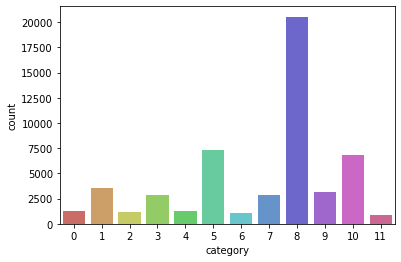

In [ ]:
figure()
sb.countplot(x='category', data=merged, palette='hls')
show()

Stemmer

In [ ]:
!git clone https://github.com/banglakit/bengali-stemmer.git

fatal: destination path 'bengali-stemmer' already exists and is not an empty directory.


In [ ]:
cd "/content/bengali-stemmer"


/content/bengali-stemmer


In [ ]:
from bengali_stemmer.rafikamal2014 import RafiStemmer
stemmer = RafiStemmer()
stemmer.stem_word('কেজিতে')

'কেজি'

Stopwords

In [ ]:
!pip install stopwordsiso
import stopwordsiso as stopwords

In [ ]:
stop_words = stopwords.has_lang("th")
stop_words = stopwords.stopwords("bn")
print(stop_words)
print(len(stop_words))

{'চেয়ে', 'পরেই', 'হলে', 'দিয়েছে', 'নতুন', 'নাকি', 'বিনা', 'সেটা', 'হওয়া', 'তিনঐ', 'মোটেই', 'যাওয়া', 'সব', 'হোক', 'এখনও', 'জন', 'হইয়া', 'ক্ষেত্রে', 'আমরা', 'বদলে', 'যায়', 'এমন', 'বি', 'কোন', 'হিসাবে', 'হয়েছেন', 'করছে', 'ধামার', 'অর্থাত', 'তাতে', 'কবে', 'মধ্যে', 'এ', 'তুমি', 'করবে', 'করেই', 'সেই', 'যতটা', 'ওরা', 'ও', 'ঠিক', 'হতেই', 'ওঁদের', 'অথচ', 'কোনো', 'পক্ষে', 'হইতে', 'হয়', 'দেওয়া', 'বেশ', 'সেখান', 'করবেন', 'যাওয়া', 'করেছে', 'বলেন', 'বহু', 'অতএব', 'হন', 'এখন', 'এটাই', 'করেছিলেন', 'ওর', 'স্বয়ং', 'কারণ', 'তাঁর', 'জানায়', 'তবে', 'হবেন', 'পেয়ে', 'রাখা', 'এর', 'ওই', 'অবধি', 'প্রায়', 'না', 'এতটাই', 'ব্যবহার', 'রেখে', 'পারে', 'আই', 'অন্তত', 'একই', 'কত', 'জানানো', 'গিয়েছে', 'বিভিন্ন', 'কমনে', 'হল', 'তখন', 'তারা', 'বিষয়টি', 'করা', 'জানতে', 'উনি', 'কোনও', 'যাতে', 'যখন', 'করায়', 'যেতে', 'একটি', 'থেকে', 'তাহাতে', 'তত', 'করার', 'ওঁর', 'তারৈ', 'তাহা', 'করাই', 'পাওয়া', 'খুব', 'দিয়ে', 'নেওয়া', 'তার', 'উপরে', 'করলেন', 'যাওয়ার', 'করি', 'বলা', 'এখানেই', 'এতে', 'হয়নি', 'রকম', 'দিয়েছ

BNLP Toolkit

In [ ]:
# https://bnlp.readthedocs.io/en/latest/
# https://github.com/banglakit/awesome-bangla

!pip install bnlp_toolkit

In [ ]:
from bnlp.corpus import stopwords, punctuations

In [ ]:
stopwordsBNLP = stopwords()
print(len(stopwordsBNLP))
print(punctuations)

398
!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~।ঃ


# Data Preprocessing

In [ ]:
merged['label'].value_counts()

1    49154
0     3463
Name: label, dtype: int64

Temporary Dataset Preparation

In [ ]:
'''
total_len = merged['label'].value_counts()[0]
negative_df = merged[merged['label']==0].head(total_len)
positive_df = merged[merged['label']==1].head(total_len)
'''

"\ntotal_len = merged['label'].value_counts()[0]\nnegative_df = merged[merged['label']==0].head(total_len)\npositive_df = merged[merged['label']==1].head(total_len)\n"

In [ ]:
'''
#merging df & df1
merge = [negative_df,positive_df]
merged = pd.concat(merge)
merged.shape
'''

'\n#merging df & df1\nmerge = [negative_df,positive_df]\nmerged = pd.concat(merge)\nmerged.shape\n'

In [ ]:
'''
#shuffle
merged = merged.sample(frac=1).reset_index(drop=True)
merged
'''

'\n#shuffle\nmerged = merged.sample(frac=1).reset_index(drop=True)\nmerged\n'

Content

In [ ]:
from bnlp.corpus.util import remove_stopwords
from bnlp import NLTKTokenizer

def removeForeign(word):
  a = "".join(i for i in word if 2432 <= ord(i) <= 2559)
  return a

def makeRemoveHyperLink(text):
  result = re.sub(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', '', text)
  return result

def MakeHTMLremove(text):
  '''
  result = re.compile('(<.*?>)')
  result = result.sub(r'', text) 
  '''
  cleancode = re.compile('<code>.*?</code>')
  cleanr = re.compile('<.*?>')
  cleanentity = re.compile('&.*;')
  cleantext = re.sub(cleancode, '', text)
  cleantext = re.sub(cleanr, ' ', cleantext)
  cleantext = re.sub(cleanentity, ' ', cleantext)
  
  return cleantext

def cleaning(updated):
  
  #html remove
  updated= updated.apply(lambda x: MakeHTMLremove(x))
  #hyperlink remove
  updated = updated.apply(lambda x: makeRemoveHyperLink(x))
  # tokenizer
  bnltk = NLTKTokenizer()
  updated = updated.apply(lambda x: bnltk.word_tokenize(x))
  # remove punctuations
  updated = updated.apply(lambda x: [item for item in x if item not in punctuations])
  # remove stop words
  updated = updated.apply(lambda x: [item for item in x if item not in stopwordsBNLP])
  # remove foreign words
  updated = updated.apply(lambda x: [ removeForeign(item) for item in x ])
  # stripping
  updated = updated.apply(lambda x: [item.strip() for item in x ])
  # remove numbers
  updated = updated.apply(lambda x: [re.sub(r'[০১২৩৪৫৬৭৮৯\.]+', '', item) for item in x ])
  # stemming
  updated = updated.apply(lambda x: [stemmer.stem_word(item) for item in x ])
  # stripping
  updated = updated.apply(lambda x: [item.strip() for item in x ])
  
  
  return updated


In [ ]:
merged[:2]

,domain,date,category,headline,content,label
55581,36,2019-11-17,8,পেঁয়া‌জের কে‌জি যেভা‌বে ২০০ থে‌কে ক‌মে ৪০ টাকা...,কুষ্টিয়ার পৌর কাঁচাবাজারে হঠাৎ করেই কেজিতে ৪০ ...,0
17840,44,2019-10-15,5,"গাঁজা সেবনে চাকরি দেবে নাসা, বেতন ১৪ লাখ!","মাদকের বিরুদ্ধে বিশ্ব যখন একাট্টা, তখন গাঁজা স...",0


In [ ]:
merged['content']=cleaning(merged['content'])
merged['content'] = merged['content'].apply(lambda x: "".join(" "+item for item in x))

Up-sampling

In [ ]:
from sklearn.utils import shuffle

# Separate majority and minority classes
data_majority = merged[merged['label'] == 1]
data_minority = merged[merged['label'] == 0]

bias = data_minority.shape[0]/data_majority.shape[0]
# lets split train/test data first then 
train = pd.concat([data_majority.sample(frac=0.8,random_state=200),
         data_minority.sample(frac=0.8,random_state=200)])
test = pd.concat([data_majority.drop(data_majority.sample(frac=0.8,random_state=200).index),
        data_minority.drop(data_minority.sample(frac=0.8,random_state=200).index)])

train = shuffle(train)
test = shuffle(test)

In [ ]:
print('positive data in training:',(train.label == 1).sum())
print('negative data in training:',(train.label == 0).sum())
print('positive data in test:',(test.label == 1).sum())
print('negative data in test:',(test.label == 0).sum())

positive data in training: 39323
negative data in training: 2770
positive data in test: 9831
negative data in test: 693


In [ ]:
from sklearn.utils import resample

# Separate majority and minority classes in training data for upsampling 
data_majority = train[train['label'] == 1]
data_minority = train[train['label'] == 0]

print("majority class before upsample:",data_majority.shape)
print("minority class before upsample:",data_minority.shape)

# Upsample minority class
data_minority_upsampled = resample(data_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples= data_majority.shape[0],    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
data_upsampled = pd.concat([data_majority, data_minority_upsampled])
 
# Display new class counts
print("After upsampling\n",data_upsampled.label.value_counts(),sep = "")

majority class before upsample: (39323, 6)
minority class before upsample: (2770, 6)
After upsampling
1    39323
0    39323
Name: label, dtype: int64


In [ ]:
length = max([len(sentence) for sentence in data_upsampled['content'].to_list()])
print("Maximum Sentence Length :",length)

Maximum Sentence Length : 15848


In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

max_fatures = 8000
length = 2000
tokenizer = Tokenizer(num_words=max_fatures, split=' ')
tokenizer.fit_on_texts(merged['content'].values) # training with whole data

X_train = tokenizer.texts_to_sequences(data_upsampled['content'].values)
X_train = pad_sequences(X_train,maxlen=length)
Y_train = pd.get_dummies(data_upsampled['label']).values
print('x_train shape:',X_train.shape)

X_test = tokenizer.texts_to_sequences(test['content'].values)
X_test = pad_sequences(X_test,maxlen=length)
Y_test = pd.get_dummies(test['label']).values
print("x_test shape", X_test.shape)

x_train shape: (78646, 2000)
x_test shape (10524, 2000)


In [ ]:
import pickle
data_org1 = {'trainX':X_train,"trainY":Y_train}
data_org2 = {"testX":X_test,"testY":Y_test,"max_fatures":max_fatures,"bias":bias}

In [ ]:
# with open('/content/drive/MyDrive/Machine Learning Algorithm/Bangla Fake News Detection/pickled_data_file1.pkl', 'wb') as fid:
#      pickle.dump(data_org1, fid)

In [ ]:
import joblib

# To dump
f = '/content/drive/MyDrive/Machine Learning Algorithm/Bangla Fake News Detection/data_file1.joblib'
joblib.dump(data_org1, f + '.bz2', compress=('bz2', 3))

['/content/drive/MyDrive/Machine Learning Algorithm/Bangla Fake News Detection/data_file1.joblib.bz2']

In [ ]:
# To dump
f = '/content/drive/MyDrive/Machine Learning Algorithm/Bangla Fake News Detection/data_file2.joblib'
joblib.dump(data_org2, f + '.bz2', compress=('bz2', 3))

['/content/drive/MyDrive/Machine Learning Algorithm/Bangla Fake News Detection/data_file2.joblib.bz2']

In [ ]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from keras.layers import SpatialDropout1D
# model
embed_dim = 128
lstm_out = 256

model = Sequential()
model.add(Embedding(max_fatures, embed_dim,input_length = X_train.shape[1]))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(lstm_out, dropout=0.4, recurrent_dropout=0.4))
model.add(Dense(2,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 2000, 128)         1024000   
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 2000, 128)         0         
_________________________________________________________________
lstm (LSTM)                  (None, 256)               394240    
_________________________________________________________________
dense (Dense)                (None, 2)                 514       
Total params: 1,418,754
Trainable params: 1,418,754
Non-trainable params: 0
_________________________________________________________________
None


Vocabulary Size

In [ ]:
# import collections
# vocabularySize = len(collections.Counter([word.strip() for sentence in preprocessed_train for word in sentence.strip().split()]))
# print("Vocabulary Size :",vocabularySize)

Maximum Sentence Length

In [ ]:
# from keras.preprocessing.text import Tokenizer

In [ ]:
# # function to build a tokenizer
# def tokenization(lines):
#   tokenizer = Tokenizer()
#   tokenizer.fit_on_texts(lines)
#   return tokenizer

In [ ]:
# banglaTokenizer = tokenization(preprocessed_train)

In [ ]:
# banglaSequence = banglaTokenizer.texts_to_sequences(preprocessed_train)

In [ ]:
# length = max([len(sentence) for sentence in banglaSequence])
# print("Maximum Sentence Length :",length)

In [ ]:
# from tensorflow.keras.preprocessing.text import one_hot
# bangla = one_hot('একাদশ জাতীয় সংসদ নির্বাচন নিয়ে কিছু কথা',7,split=' ')
# english = one_hot('we want to talk something',5)
# print(bangla)
# print(english)

# Model Selection

In [ ]:
# # one hot representation
# onehot_rep = [one_hot(words, vocabularySize) for words in preprocessed_train]

In [ ]:
# from keras.preprocessing.sequence import pad_sequences
# # pad_sequences
# embedded_doc=pad_sequences(onehot_rep, padding='pre', maxlen=length)

In [ ]:
# from tensorflow.keras.layers import Embedding
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import LSTM
# from tensorflow.keras.layers import Dense

In [ ]:
# # model build 
# embedding_vector_feature = 100
# model=Sequential()
# model.add(Embedding(vocabularySize,embedding_vector_feature,input_length=length))
# model.add(LSTM(100))
# model.add(Dense(1,activation='sigmoid'))
# model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# print(model.summary())

In [ ]:
# # check shape 
# len(embedded_doc),y_train.shape

In [ ]:
# # final data for NN
# X_final=np.array(embedded_doc)
# y_final=np.array(y_train)
# X_final.shape,y_final.shape

In [ ]:
# # train model
# history = model.fit(X_final,y_final, validation_split=0.2, epochs=2, batch_size=64)